import dependencies


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data collection and Analysis

In [38]:
customer_data=pd.read_csv("C:/Users/ASUS/Desktop/datascience/jupyter_notebook/customerSegment/Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Number of raws ad columns in this data frame


In [39]:
customer_data.shape

(200, 5)

information in this data set

In [40]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


checking for missing values


In [41]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

using annual income and spending score for the clustering

In [42]:
X=customer_data.iloc[:,[3,4]].values             #locating  all the values in 3rd and 4th indexing ':' indicate that select all rows (rowxcolumns)
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Exploratory Data Analysis

Distribution of Male and Female

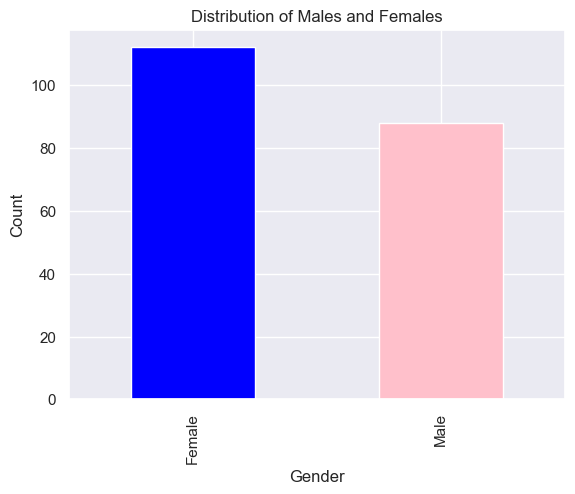

In [43]:
# Count the occurrences of each gender
gender_counts = customer_data['Gender'].value_counts()

# Create bar chart
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Distribution of age

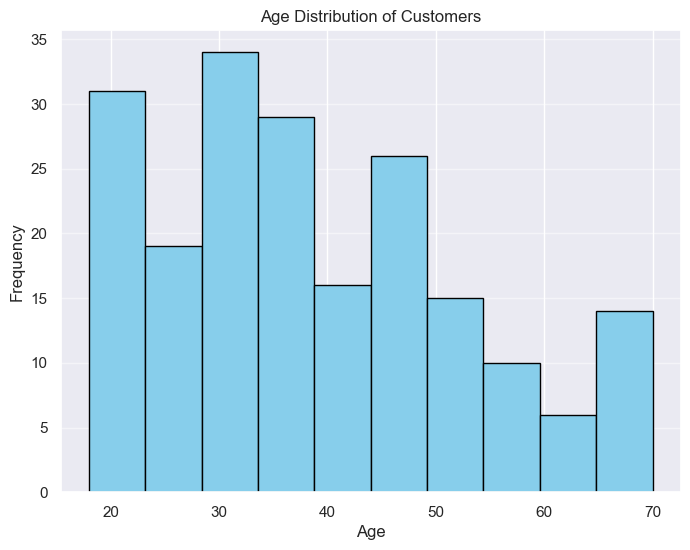

In [44]:
# Create histogram for age distribution
# Create histogram for age distribution
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(customer_data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

Distribution of anual income

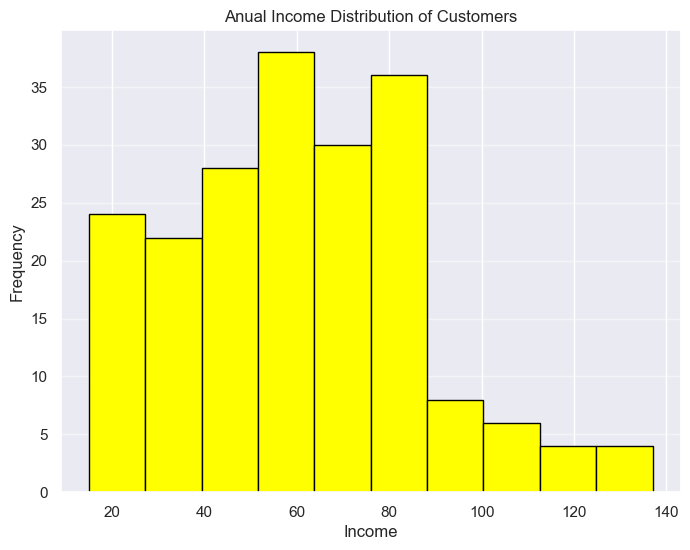

In [45]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(customer_data['Annual Income (k$)'], bins=10, color='yellow', edgecolor='black')
plt.title('Anual Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

Distribution of spending amount

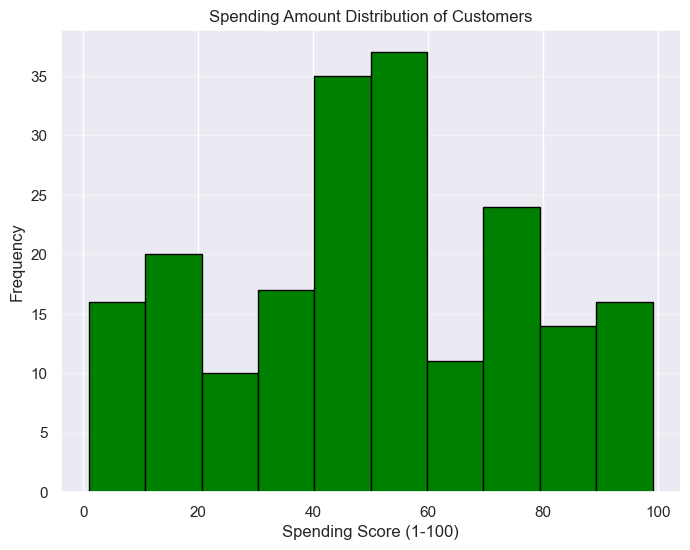

In [46]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(customer_data['Spending Score (1-100)'], bins=10, color='green', edgecolor='black')
plt.title('Spending Amount Distribution of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

choose optimum number of clusters
we use WCSS(within cluster sum of squares) parameter to find the optimum number of clusters

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

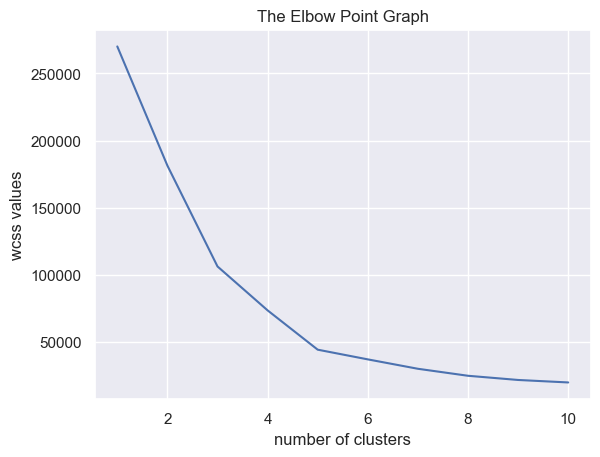

In [47]:
#finding wcss values for different nummber of clusters in this case max 10 clusters

wcss=[]
for i in range(1,11):    
         kmeans= KMeans(n_clusters=i,init='k-means++', random_state=42)
         kmeans.fit(X)
         wcss.append(kmeans.inertia_) #give wcss values


#plotting the Elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("number of clusters")
plt.ylabel("wcss values")
plt.show()

Optimum number of clusters = 5

# Training the K-Means Clustering model

In [48]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5 clusters : 0,1,2,3,4

Visualtising all the clusters

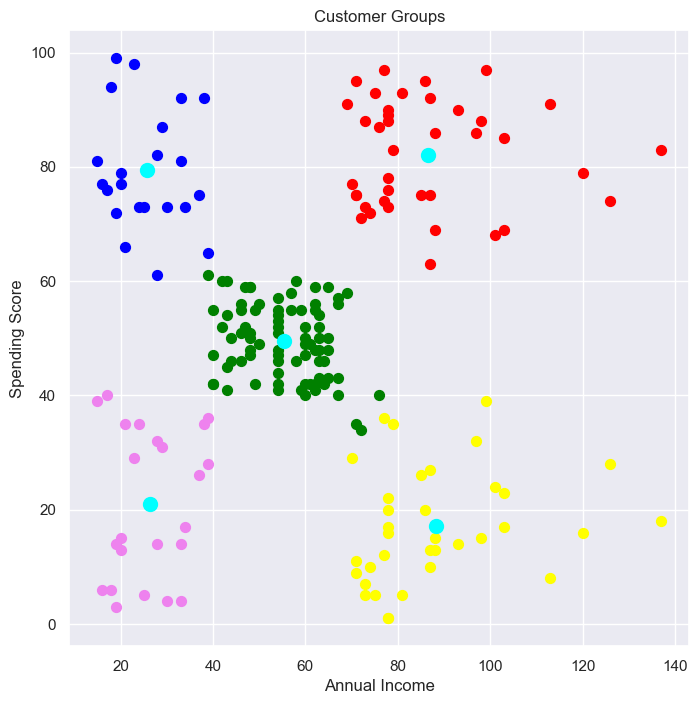

In [49]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()